In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from fractions import Fraction
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [8]:
leaderboard = pd.read_csv('leaderboard.csv')
leaderboard.head()

,rank,profile_id,rating,name,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops,last_match,last_match_time
0,1,251265,2324,[aM] MbL40C,2372.0,3,-9.0,17.0,1519,1054,465,80,1594679211,1594679211
1,2,208393,2316,Nicov,2316.0,13,-4.0,19.0,601,449,152,6,1594642838,1594642838
2,3,197388,2308,Secret TaToH,2343.0,1,-5.0,21.0,416,298,118,3,1594491890,1594491890
3,4,199325,2303,[aM] Hera,2373.0,-2,-6.0,21.0,1399,945,454,10,1594675885,1594675885
4,5,196240,2298,TheViper,2341.0,2,-5.0,22.0,470,328,142,1,1594417850,1594417850


In [9]:
leaderboard.tail()

,rank,profile_id,rating,name,highest_rating,streak,lowest_streak,highest_streak,games,wins,losses,drops,last_match,last_match_time
36449,36450,2113892,242,Liewe Heksie,719.0,-1,-10.0,3.0,104,24,80,2,1594213492,1594213492
36450,36451,1950140,242,Suit up bro,743.0,-19,-19.0,4.0,77,16,61,5,1593809948,1593809948
36451,36452,2573338,218,goprogambler,672.0,-9,-40.0,5.0,249,40,209,37,1594618993,1594618993
36452,36453,2750718,191,wayneniky,758.0,-1,-19.0,3.0,71,11,60,8,1594576128,1594576128
36453,36454,378095,175,lauran1,688.0,-12,-17.0,1.0,59,5,54,1,1592601275,1592601275


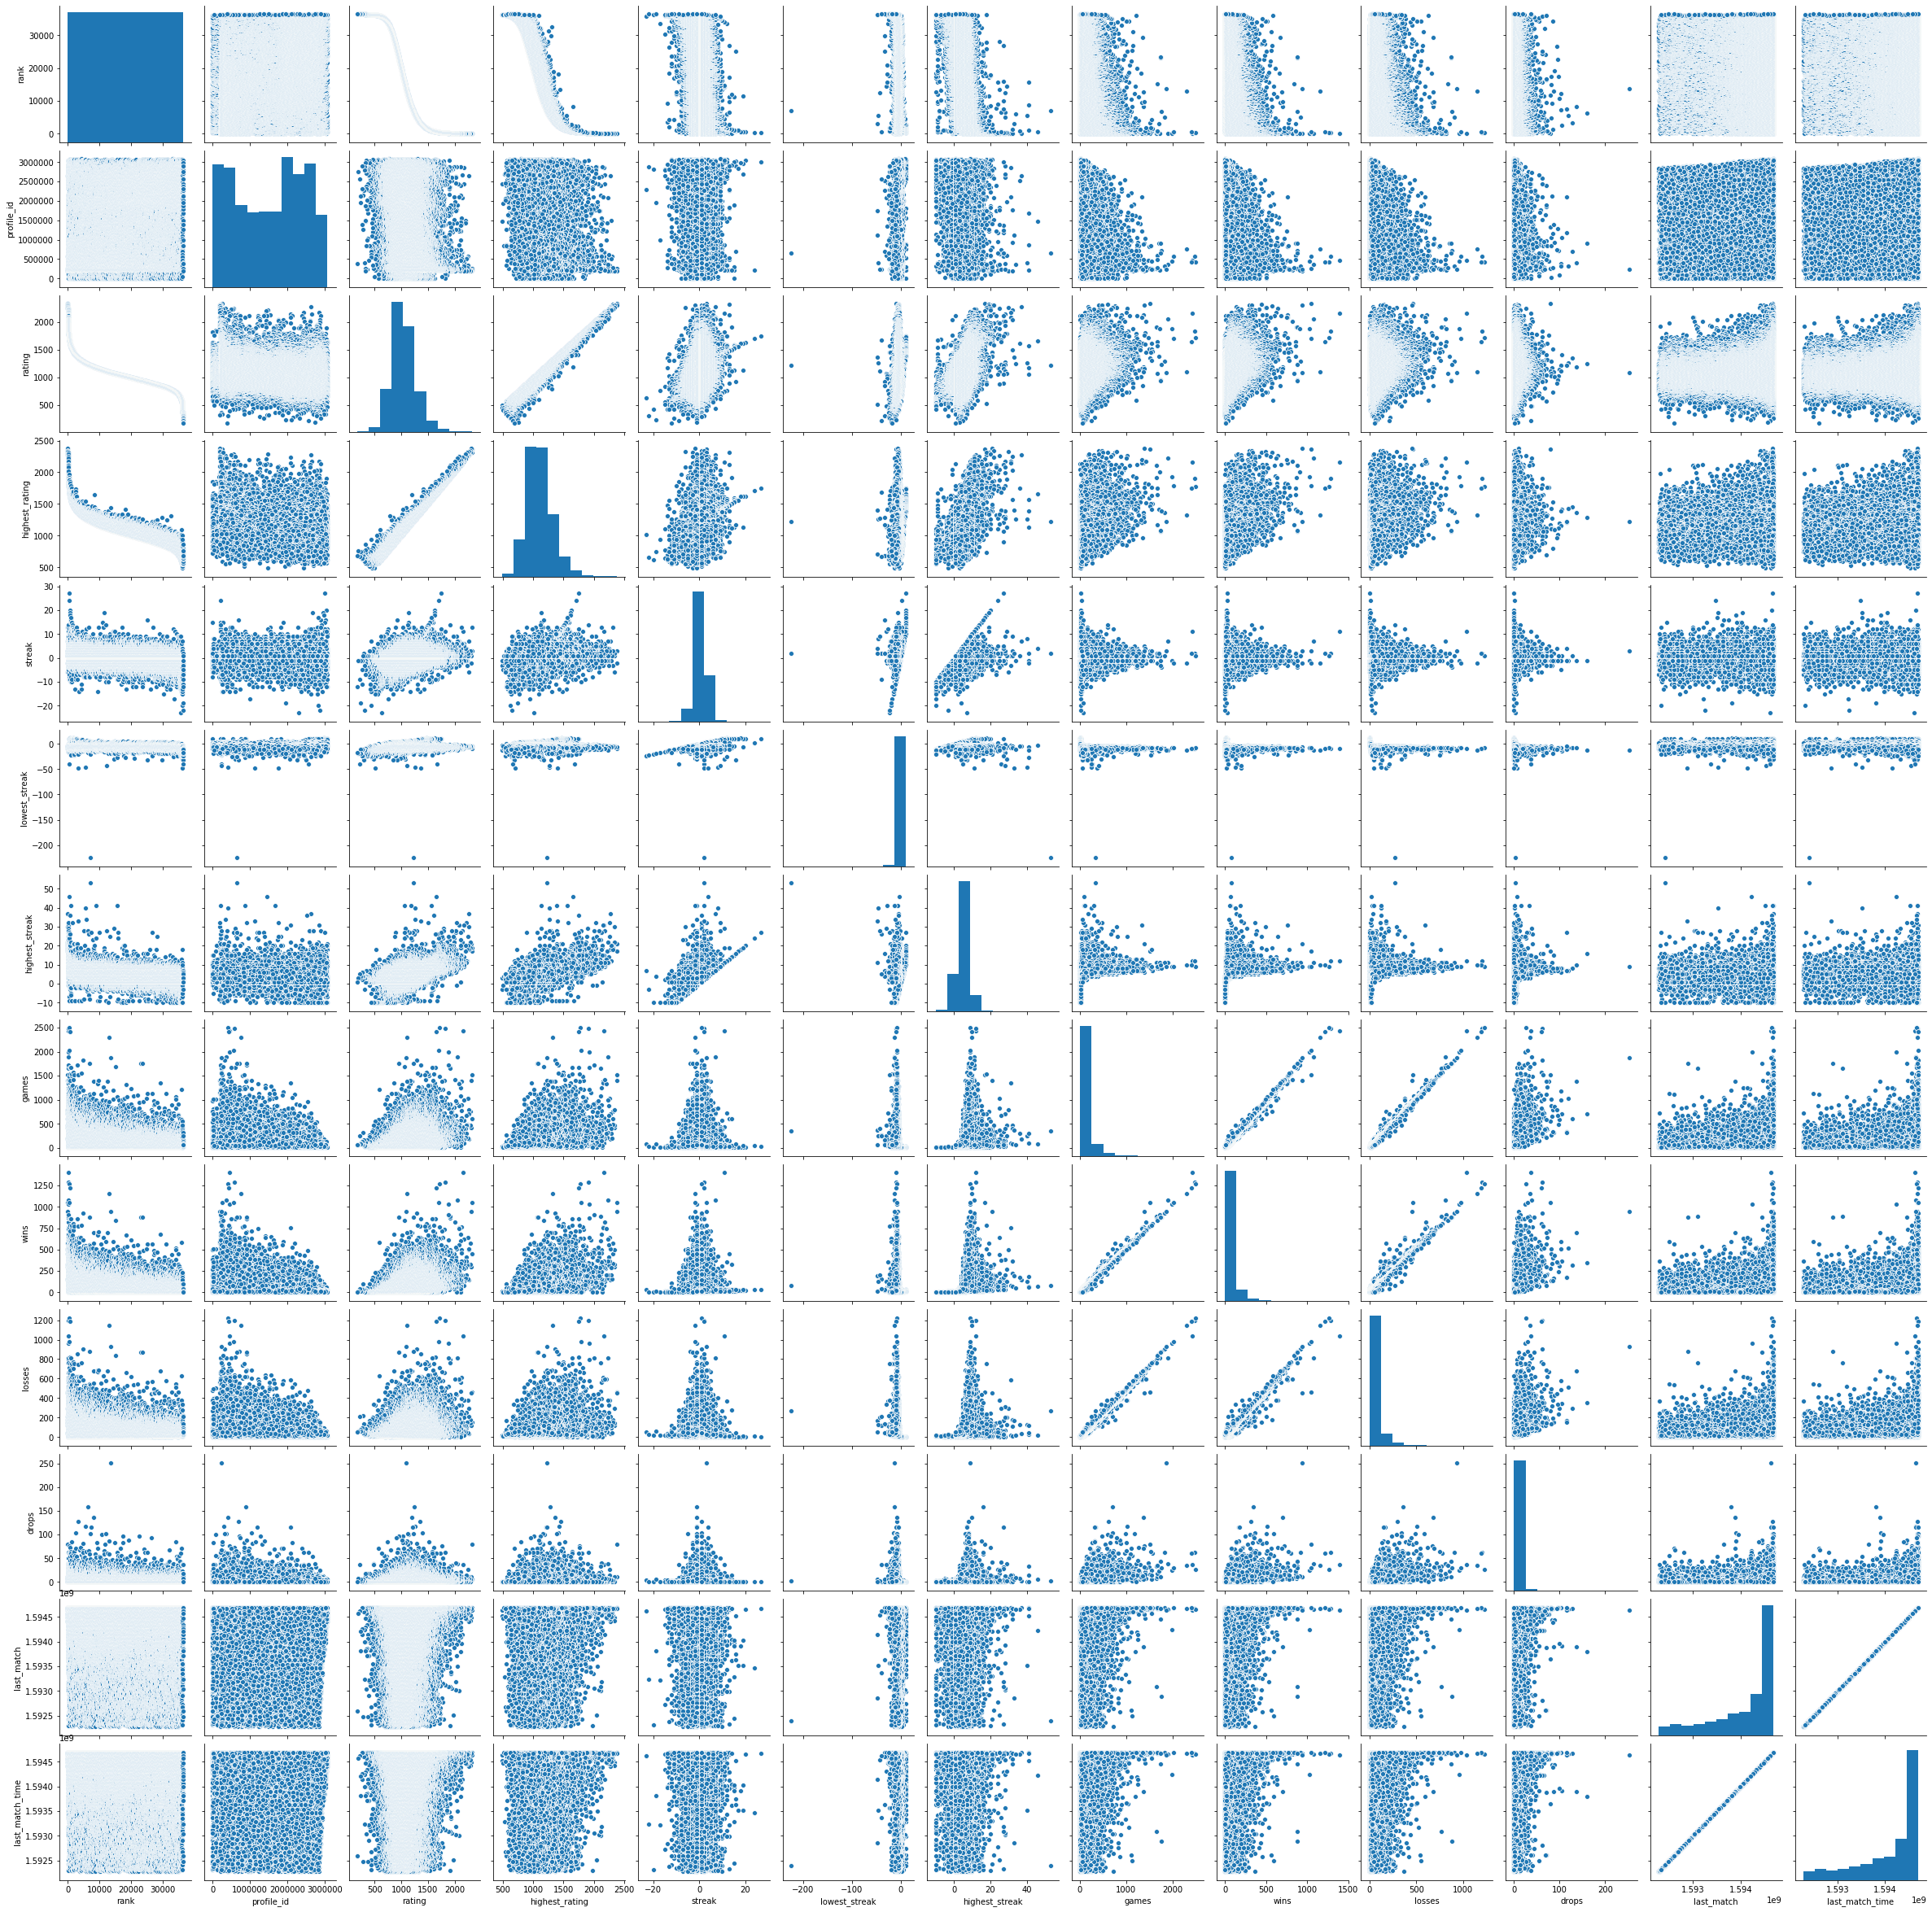

In [10]:
sns.pairplot(leaderboard)

(0, 2521.158862105944)

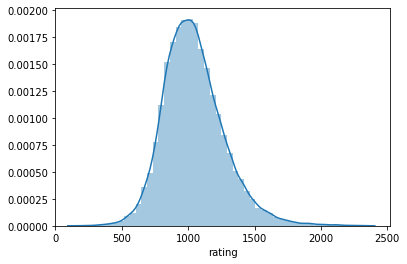

In [11]:
sns.distplot(leaderboard['rating'])
plt.xlim(0, None)

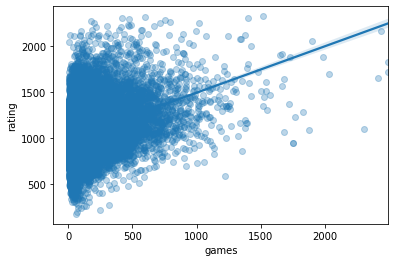

In [12]:
sns.regplot(x = leaderboard['games'], y = leaderboard['rating'], scatter_kws={'alpha':0.3})

In [13]:
leaderboard['rating'].mean()

1044.2410435068855

In [14]:
leaderboard['rating'].median()

1022.0

In [15]:
leaderboard['rating'].quantile(0.999999999130029)

2323.9997462955653

In [16]:
leaderboard['rating'].std()

230.3082806191848

In [17]:
higher = leaderboard['rating'].mean() + 3*leaderboard['rating'].std()
higher

1735.1658853644399

In [18]:
viperZscore = (leaderboard['rating'][0] - leaderboard['rating'].mean())/leaderboard['rating'].std()
viperZscore

5.556721421620087

In [19]:
rv = norm()
probs = rv.cdf(viperZscore)
probs

0.9999999862555524

In [21]:
X = leaderboard[['games']]
y = leaderboard['highest_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted.shape

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

(0, 2511.291151306209)

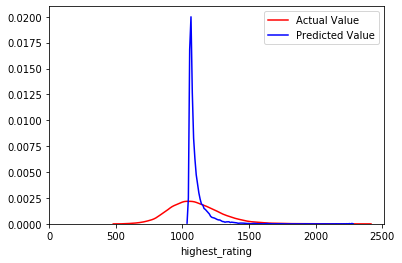

In [12]:
sns.distplot(y_test, hist=False, color='red', label='Actual Value')
sns.distplot(predicted, hist=False, color='blue', label='Predicted Value')
plt.xlim(0, None)

In [15]:
r2 = r2_score(y_test,predicted)
print(r2)

0.13829098346166513


In [26]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
accuracy_score(y_test, predicted_knn)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

(0, 2408.3)

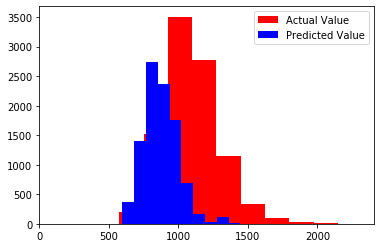

In [18]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_knn, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

In [27]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
predicted_mlp = mlp.predict(X_test)
accuracy_score(y_test,predicted_mlp)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_mlp, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)